### Data Extraction

In [1]:
f = open('C:/Users/HP/Documents/NLP/slatestarcodex.year.2020.txt', 'r', encoding = 'utf-8')
posts2020 = f.read()
f = open('C:/Users/HP/Documents/NLP/slatestarcodex.year.2019.txt', 'r', encoding = 'utf-8')
posts2019 = f.read()

In [2]:
posts2020 = posts2020.split('\n\n\n\n\n\n')
posts2019 = posts2019.split('\n\n\n\n\n\n')

In [3]:
posts = posts2020 + posts2019

In [6]:
len(posts)

249

In [4]:
# for i, post in enumerate(posts):
#     print('==========' + str(i) + '==========')
#     print(post[:100])

In [5]:
import re
f = open('C:/Users/HP/Documents/NLP/MySQL_stopwords.txt', 'r', encoding = 'utf-8')
stop_words = f.read()
stop_words = re.split(' \t|\n', stop_words)

### Basic Text Wrangling

In [6]:
%%time
import nltk
from nltk import TweetTokenizer
# stop_words = nltk.corpus.stopwords.words('english')
tokenizer = TweetTokenizer()
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
def normalize_corpora(corpora):
    normalized_corpora = []
    for corpus in corpora:
        # Lowercase
        corpus = corpus.lower()
        # Replace 
        corpus = corpus.replace("/", " ")
        corpus = corpus.replace("’", "'")
        corpus = corpus.replace("'s", "")
        # Remove numbers
        corpus = re.sub('[^A-Za-z-\']+', ' ', corpus)
        # Strip spaces
        corpus_tokens = tokenizer.tokenize(corpus)
        # Remove stopwords
        corpus_tokens = [token for token in corpus_tokens if token not in stop_words]
        # Lemmatize
        corpus_tokens = [lemmatizer.lemmatize(token) for token in corpus_tokens if not token.isnumeric()]
        # Remove single characters
        corpus_tokens = [token for token in corpus_tokens if len(token) > 1]
        # Remove empty corpus
        if corpus_tokens:
            normalized_corpora.append(corpus_tokens)
    return normalized_corpora
normalized_posts = normalize_corpora(posts)

Wall time: 8.87 s


In [7]:
posts_no_none = []
for post in posts:
    post = post.replace("\n", " ")
    if post:
        posts_no_none.append(post)

### Text Representation with Feature Engineering

In [8]:
import gensim
bigram = gensim.models.Phrases(normalized_posts, min_count = 10, threshold = 10, delimiter = b'_')
bigram_model = gensim.models.phrases.Phraser(bigram)

In [9]:
bigram_model[normalized_posts[0]][:50]

['doctor',
 'ninety',
 'percent',
 'driver',
 'above-average',
 'driver',
 'ninety',
 'percent',
 'professor',
 'above-average',
 'professor',
 'relevant',
 'study',
 'paywalled',
 'trust',
 'recent',
 'discussion',
 'therapy_book',
 'make_sense',
 'ninety',
 'percent',
 'therapist',
 'believed',
 'above-average',
 'therapist',
 'pretty',
 'ninety',
 'percent',
 'doctor',
 'above-average',
 'doctor',
 'trap',
 'noticed',
 'falling',
 'explain',
 'patient',
 'doctor',
 'worse',
 'good',
 'doctor',
 'stay',
 'patient',
 'bad',
 'doctor',
 'doctor',
 'doctor',
 'current',
 'patient',
 'doctor',
 'worse']

In [10]:
normalized_corpus_bigrams = [bigram_model[post] for post in normalized_posts]
# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(normalized_corpus_bigrams)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, 'above-average'), (1, 'absolutely'), (2, 'addiction'), (3, 'addictive'), (4, 'address'), (5, 'afford'), (6, 'annoying'), (7, 'answer'), (8, 'appointment'), (9, 'assume'), (10, 'autonomy'), (11, 'average'), (12, 'avoid'), (13, 'awkward'), (14, 'bad')]
Total Vocabulary Size: 22520


In [11]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below = 5, no_above = 0.5)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 4706


In [12]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in normalized_corpus_bigrams]
print(bow_corpus[0][:50])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 5), (21, 1), (22, 1), (23, 6), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1)]


In [13]:
print([(dictionary[idx] , freq) for idx, freq in bow_corpus[1][:50]])

[('benefit', 2), ('care', 1), ('focused', 1), ('forget', 1), ('hard', 1), ('left', 1), ('month', 3), ('place', 1), ('practice', 1), ('raise', 1), ('relevant', 1), ('state', 1), ('transfer', 1), ('true', 1), ('worse', 1), ('abuse', 1), ('accusation', 1), ('accused', 1), ('achieved', 1), ('action', 2), ('admit', 1), ('africa', 1), ('agreed', 1), ('algorithm', 1), ('american', 1), ('ancestor', 1), ('ancient', 1), ('argued', 1), ('attention', 1), ('back', 1), ('background', 2), ('ban', 1), ('based', 1), ('basic_income', 1), ('belief', 1), ('bend', 2), ('biden', 2), ('biology', 1), ('bird', 5), ('board', 1), ('building', 1), ('called', 1), ('campaign', 4), ('child', 1), ('chosen', 1), ('citizen', 1), ('city', 2), ('claim', 3), ('close', 1), ('coast', 1)]


### Topic Models with Latent Semantic Indexing (LSI)

In [14]:
%%time
TOTAL_TOPICS = 10
lsi_bow = gensim.models.LsiModel(bow_corpus, id2word = dictionary, num_topics = TOTAL_TOPICS,
                                 onepass = True, chunksize = len(bow_corpus), power_iters = 1000)

Wall time: 32 s


In [15]:
# for topic_id, topic in lsi_bow.print_topics(num_topics = TOTAL_TOPICS, num_words = 10):
#     print('Topic #' + str(topic_id+1) + ':')
#     print(topic)
#     print()

In [16]:
for n in range(TOTAL_TOPICS):
    print('Topic #'+str(n+1)+':')
    print('=' * 50)
    d1 = []
    d2 = []
    for term, wt in lsi_bow.show_topic(n, topn = 20):
        if wt >= 0:
            d1.append((term, round(wt, 3)))
        else:
            d2.append((term, round(wt, 3)))
    print('Direction 1:', d1)
    print('-'*50)
    print('Direction 2:', d2)
    print('-'*50)
    print()

Topic #1:
Direction 1: []
--------------------------------------------------
Direction 2: [('study', -0.161), ('human', -0.147), ('college', -0.139), ('experience', -0.133), ('life', -0.128), ('case', -0.113), ('number', -0.111), ('animal', -0.105), ('book', -0.096), ('government', -0.09), ('bad', -0.088), ('idea', -0.088), ('student', -0.085), ('important', -0.084), ('true', -0.083), ('evidence', -0.081), ('system', -0.079), ('level', -0.079), ('reason', -0.078), ('state', -0.078)]
--------------------------------------------------

Topic #2:
Direction 1: [('experience', 0.176), ('human', 0.125), ('animal', 0.115), ('study', 0.099), ('life', 0.087)]
--------------------------------------------------
Direction 2: [('college', -0.608), ('student', -0.294), ('harvard', -0.253), ('school', -0.203), ('number', -0.124), ('admission', -0.113), ('applicant', -0.11), ('increasing', -0.11), ('lawyer', -0.088), ('top', -0.083), ('application', -0.08), ('education', -0.064), ('tuition', -0.064), 

In [17]:
term_topic = lsi_bow.projection.u
singular_values = lsi_bow.projection.s
topic_document = (gensim.matutils.corpus2dense(lsi_bow[bow_corpus], len(singular_values)).T / singular_values).T
term_topic.shape, singular_values.shape, topic_document.shape

((4706, 10), (10,), (10, 247))

In [18]:
import pandas as pd
import numpy as np
document_topics = pd.DataFrame(np.round(topic_document.T, 3), 
                               columns=['T' + str(i) for i in range(1, TOTAL_TOPICS+1)])

In [19]:
document_numbers = [50, 100, 150]
for document_number in document_numbers:
    top_topics = list(document_topics.columns[np.argsort(-np.absolute(document_topics.iloc[document_number].values))[:3]])
    print('Document #' + str(document_number) + ':')
    print('Dominant Topics (top 3):', top_topics)
    print('Paper Summary:')
    print(posts[document_number][:500])
    print()

Document #50:
Dominant Topics (top 3): ['T1', 'T5', 'T6']
Paper Summary:
Book Review: Origin Of Consciousness In The Breakdown Of The Bicameral Mind


I.

Julian Jaynes’ The Origin Of Consciousness In The Breakdown Of The Bicameral Mind is a brilliant book, with only two minor flaws. First, that it purports to explains the origin of consciousness. And second, that it posits a breakdown of the bicameral mind. I think it’s possible to route around these flaws while keeping the thesis otherwise intact. So I’m going to start by reviewing a slightly different book, the on

Document #100:
Dominant Topics (top 3): ['T7', 'T8', 'T5']
Paper Summary:
OT124: Opentatonic Thread


This is the bi-weekly visible open thread (there are also hidden open threads twice a week you can reach through the Open Thread tab on the top of the page). Post about anything you want, but please try to avoid hot-button political and social topics. You can also talk at the SSC subreddit or the SSC Discord server – and 

### Topic Models with Latent Dirichlet Allocation (LDA)

In [20]:
%%time
lda_model = gensim.models.LdaModel(corpus = bow_corpus, id2word = dictionary, chunksize = len(bow_corpus), 
                                   alpha = 'auto', eta = 'auto', random_state = 42,
                                   iterations = 500, num_topics = TOTAL_TOPICS, 
                                   passes = 50, eval_every = None)

Wall time: 22.4 s


In [21]:
topics_coherences = lda_model.top_topics(bow_corpus, topn=20)
avg_coherence_score = np.mean([item[1] for item in topics_coherences])
print('Avg. Coherence Score:', avg_coherence_score)

Avg. Coherence Score: -1.9371252861506711


In [22]:
topics_with_wts = [item[0] for item in topics_coherences]
print('LDA Topics with Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([(term, round(wt, 3)) for wt, term in topic])
    print()

LDA Topics with Weights
Topic #1:
[('patient', 0.007), ('theory', 0.006), ('doctor', 0.005), ('study', 0.004), ('book', 0.004), ('evidence', 0.004), ('human', 0.004), ('mask', 0.004), ('case', 0.004), ('true', 0.003), ('process', 0.003), ('back', 0.003), ('real', 0.003), ('bad', 0.003), ('pain', 0.003), ('culture', 0.003), ('state', 0.003), ('feel', 0.003), ('science', 0.003), ('level', 0.003)]

Topic #2:
[('idea', 0.008), ('group', 0.006), ('bias', 0.006), ('competition', 0.006), ('child', 0.005), ('survey', 0.005), ('book', 0.005), ('society', 0.005), ('company', 0.005), ('result', 0.004), ('argument', 0.004), ('effect', 0.004), ('question', 0.004), ('system', 0.003), ('woman', 0.003), ('animal', 0.003), ('person', 0.003), ('evolution', 0.003), ('social', 0.003), ('bad', 0.003)]

Topic #3:
[('government', 0.01), ('money', 0.007), ('country', 0.006), ('article', 0.006), ('coronavirus', 0.005), ('million', 0.005), ('billionaire', 0.005), ('case', 0.005), ('life', 0.004), ('charity', 0.

In [23]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model = lda_model, corpus = bow_corpus, 
                                                      texts = normalized_corpus_bigrams,
                                                      dictionary = dictionary, 
                                                      coherence = 'c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()
umass_coherence_model_lda = gensim.models.CoherenceModel(model = lda_model, corpus = bow_corpus, 
                                                         texts = normalized_corpus_bigrams,
                                                         dictionary = dictionary, 
                                                         coherence = 'u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()
perplexity = lda_model.log_perplexity(bow_corpus)
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.3416720490885158
Avg. Coherence Score (UMass): -1.9371252861506716
Model Perplexity: -7.826103585722698


### LDA Tuning - Finding Optimal Number of Topics

In [24]:
MALLET_PATH = 'C:/mallet-2.0.8/bin/mallet'
import os
from gensim.models.wrappers import LdaMallet
from tqdm import tqdm
os.environ['MALLET_HOME'] = 'C:/mallet-2.0.8'

def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count = 1, end_topic_count = 20, step = 1,
                                    cpus = 8):
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count + 1, step)):
        mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path = MALLET_PATH, corpus = corpus,
                                                            num_topics = topic_nums, id2word = dictionary,
                                                            iterations = 100, workers = cpus, random_seed = 20210224)
        cv_coherence_model_mallet_lda = gensim.models.CoherenceModel(model = mallet_lda_model, corpus = corpus, 
                                                                     texts = texts, dictionary = dictionary, 
                                                                     coherence = 'c_v')
        coherence_score = cv_coherence_model_mallet_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(mallet_lda_model)
    return models, coherence_scores

In [25]:
end_topic_count = 40
lda_models, coherence_scores = topic_model_coherence_generator(corpus = bow_corpus, texts = normalized_corpus_bigrams,
                                                               dictionary = dictionary, start_topic_count = 1,
                                                               end_topic_count = end_topic_count, step = 1, cpus = 8)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [12:36<00:00, 18.92s/it]


In [26]:
coherence_df = pd.DataFrame({'Number of Topics': range(1, end_topic_count + 1, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df = coherence_df.sort_values(by = 'Coherence Score', ascending = False).head(10)

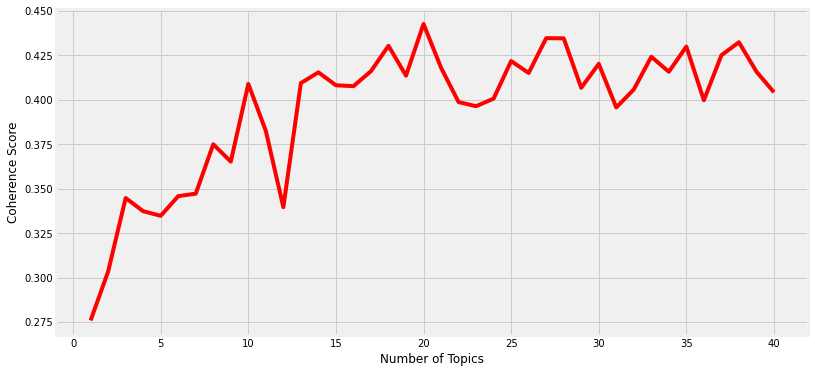

In [27]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

x_ax = range(1, end_topic_count + 1, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c = 'r')
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

In [28]:
best_model_idx = coherence_df['Number of Topics'].index[0]
best_lda_model = lda_models[best_model_idx]
best_lda_model.num_topics

20

In [29]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]
for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['book', 'argument', 'bias', 'person', 'evidence', 'important', 'claim', 'reason', 'position', 'author', 'bad', 'question', 'social', 'action', 'idea', 'conflict', 'case', 'topic', 'society', 'information']

Topic #2:
['patient', 'brain', 'level', 'therapy', 'depression', 'control', 'system', 'paper', 'treatment', 'disorder', 'study', 'therapist', 'pretty', 'higher', 'wrong', 'high', 'feeling', 'stress', 'talk', 'depressed']

Topic #3:
['read', 'plan', 'wrong', 'job', 'idea', 'rule', 'discussion', 'feel', 'stop', 'post', 'fight', 'thread', 'making', 'hard', 'reason', 'working', 'internet', 'expected', 'secret', 'game']

Topic #4:
['article', 'case', 'coronavirus', 'country', 'real', 'study', 'death', 'medical', 'link', 'month', 'medium', 'risk', 'disease', 'related', 'number', 'chance', 'pandemic', 'bad', 'expert', 'virus']

Topic #5:
['contact', 'location', 'comment', 'post', 'city', 'ssc', 'detail', 'meetup', 'place', 'blog', 'group', 'week', 'house', 'dot', 'interested', '

In [30]:
pd.set_option('display.max_colwidth', 200)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Topic Desc'],
                         index = range(1, best_lda_model.num_topics + 1)
                         )
topics_df

,Topic Desc
1,"book, argument, bias, person, evidence, important, claim, reason, position, author, bad, question, social, action, idea, conflict, case, topic, society, information"
2,"patient, brain, level, therapy, depression, control, system, paper, treatment, disorder, study, therapist, pretty, higher, wrong, high, feeling, stress, talk, depressed"
3,"read, plan, wrong, job, idea, rule, discussion, feel, stop, post, fight, thread, making, hard, reason, working, internet, expected, secret, game"
4,"article, case, coronavirus, country, real, study, death, medical, link, month, medium, risk, disease, related, number, chance, pandemic, bad, expert, virus"
5,"contact, location, comment, post, city, ssc, detail, meetup, place, blog, group, week, house, dot, interested, culture_war, room, meetups, email, event"
6,"culture, food, competition, evolution, plant, machine, animal, oil, found, step, learn, bird, technique, evolutionary, language, system, water, told, body, complicated"
7,"government, money, million, billionaire, charity, billion, spending, power, foundation, life, election, politics, spend, democratic, top, political, fund, effort, donation, donate"
8,"experience, god, belief, perception, mind, spiritual_experience, sense, religion, subject, preference, religious, thought, view, object, dream, nature, reality, voice, spiritual, enlightenment"
9,"great, history, back, story, war, black, book, put, state, end, start, century, true, america, head, chapter, life, stage, grain, talking"
10,"future, human, participant, prior, abortion, fetus, life, due, experience, case, consciousness, harm, argument, development, present, woman, data, risk, conclusion, potential"


### Interpreting Topic Model Results

In [31]:
tm_results = best_lda_model[bow_corpus]

In [32]:
corpus_topics = [sorted(topics, key = lambda record: -record[1])[0] for topics in tm_results]

In [33]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(posts_no_none))
corpus_topic_df['Dominant Topic'] = [item[0] + 1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1] * 100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Topic Desc'] for t in corpus_topics]
corpus_topic_df['Post'] = posts_no_none
corpus_topic_df.head()

,Document,Dominant Topic,Contribution %,Topic Desc,Post
0,0,2,31.59,"patient, brain, level, therapy, depression, control, system, paper, treatment, disorder, study, therapist, pretty, higher, wrong, high, feeling, stress, talk, depressed","Why Doctors Think They’re The Best Ninety percent of drivers think they’re above-average drivers, ninety percent of professors think they’re above-average professors etc. The relevant studies ar..."
1,1,1,16.73,"book, argument, bias, person, evidence, important, claim, reason, position, author, bad, question, social, action, idea, conflict, case, topic, society, information","Hardball Questions For The Next Debate (2020) [Previously: Hardball Questions (2016), More Hardball Questions (2016). I stole parts of the Buttigieg question from Twitter, but don’t remember eno..."
2,2,14,30.91,"doctor, drug, gpt, day, case, fda, word, pain, patient, learn, addiction, psychiatrist, hour, give, stop, ketamine, friend, man, love, move","A Very Unlikely Chess Game Almost 25 years after Kasparov vs. Deep Blue, another seminal man vs. machine matchup: Neither competitor has much to be proud of here. White has a poor opening. Blac..."
3,3,12,10.89,"theory, model, science, ai, paradigm, scientific, human, scientist, space, prediction, fact, understand, process, language, ability, kuhn, task, term, energy, idea","What Intellectual Progress Did I Make In The 2010s? One of the best parts of writing a blog is being able to answer questions like this. Whenever I felt like I understood new and important, I wr..."
4,4,10,14.58,"future, human, participant, prior, abortion, fetus, life, due, experience, case, consciousness, harm, argument, development, present, woman, data, risk, conclusion, potential","2019 Adversarial Collaboration Winners Thanks to everyone who participated and/or voted in the 2019 Adversarial Collaboration Contest. And the winner is… … … Adrian Liberman and Calvin Reese,..."


### Dominant Topics Distribution across Corpus

In [34]:
topic_stats_df = corpus_topic_df.groupby('Dominant Topic').count()
topic_stats_df = topic_stats_df.drop(['Contribution %', 'Topic Desc', 'Post'], axis = 1)
topic_stats_df.columns = ['# of Docs']
topic_stats_df['% Total Docs'] = round(100 * topic_stats_df['# of Docs'] / sum(topic_stats_df['# of Docs']), 2)
topic_stats_df['Topic Desc'] = topics_df['Topic Desc']
topic_stats_df.sort_values('% Total Docs', ascending = False)

,# of Docs,% Total Docs,Topic Desc
Dominant Topic,,,
5,38,15.38,"contact, location, comment, post, city, ssc, detail, meetup, place, blog, group, week, house, dot, interested, culture_war, room, meetups, email, event"
17,21,8.50,"child, men, survey, result, question, effect, woman, autism, gender, answer, sample, intelligence, partner, data, couple, marriage, difference, iq, relationship, father"
4,20,8.10,"article, case, coronavirus, country, real, study, death, medical, link, month, medium, risk, disease, related, number, chance, pandemic, bad, expert, virus"
16,17,6.88,"college, student, school, harvard, prediction, number, teacher, day, top, education, past, university, end, post, current, month, average, class, application, california"
8,13,5.26,"experience, god, belief, perception, mind, spiritual_experience, sense, religion, subject, preference, religious, thought, view, object, dream, nature, reality, voice, spiritual, enlightenment"
15,13,5.26,"made, started, left, happened, sound, party, sort, country, side, modern, list, finally, movement, wanted, thought, idea, long, bad, power, city"
3,12,4.86,"read, plan, wrong, job, idea, rule, discussion, feel, stop, post, fight, thread, making, hard, reason, working, internet, expected, secret, game"
6,12,4.86,"culture, food, competition, evolution, plant, machine, animal, oil, found, step, learn, bird, technique, evolutionary, language, system, water, told, body, complicated"
2,12,4.86,"patient, brain, level, therapy, depression, control, system, paper, treatment, disorder, study, therapist, pretty, higher, wrong, high, feeling, stress, talk, depressed"


### Relevant Posts per Topic based on Dominance

In [35]:
relevant_posts = corpus_topic_df.groupby('Dominant Topic') \
.apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0]))
relevant_posts.sort_values('Contribution %', ascending = False)

,Document,Dominant Topic,Contribution %,Topic Desc,Post
Dominant Topic,,,,,
5,195,5,78.20,"contact, location, comment, post, city, ssc, detail, meetup, place, blog, group, week, house, dot, interested, culture_war, room, meetups, email, event","SSC Meetups 2019: Times And Places Thanks to everyone who offered to host a meetup. Full list of cities, times, and places is below. If you’re reading this, you’re invited. Please don’t feel lik..."
10,236,10,71.98,"future, human, participant, prior, abortion, fetus, life, due, experience, case, consciousness, harm, argument, development, present, woman, data, risk, conclusion, potential","[ACC] When During Fetal Development Does Abortion Become Morally Wrong? [This is an entry to the 2019 Adversarial Collaboration Contest by BlockOfNihilism and Icerun] Note: For simplicity, we h..."
9,47,9,63.00,"great, history, back, story, war, black, book, put, state, end, start, century, true, america, head, chapter, life, stage, grain, talking","Pictured: Ebony Raven and “a huge black flame floating in the middle of the air.” If Ebony had accepted Hagrid, he would have turned into Harry, united with her for the second alchemical wedding, ..."
19,121,19,60.94,"population, period, price, increase, worker, cycle, graph, cost, rate, wage, growth, increasing, job, data, trend, average, number, labor, productivity, income","1960: The Year The Singularity Was Cancelled [Epistemic status: Very speculative, especially Parts 3 and 4. Like many good things, this post is based on a conversation with Paul Christiano; most..."
17,9,17,57.17,"child, men, survey, result, question, effect, woman, autism, gender, answer, sample, intelligence, partner, data, couple, marriage, difference, iq, relationship, father",Assortative Mating And Autism Introduction Assortative mating is when similar people marry and have children. Some people worry about assortative mating in Silicon Valley: highly analytical tec...
1,172,1,54.69,"book, argument, bias, person, evidence, important, claim, reason, position, author, bad, question, social, action, idea, conflict, case, topic, society, information",Caution On Bias Arguments “You say it’s important to overcome biases. So isn’t it hypocritical that you’re not trying to overcome whichever bias prevents you from realizing you’re wrong and I’m ...
12,68,12,51.99,"theory, model, science, ai, paradigm, scientific, human, scientist, space, prediction, fact, understand, process, language, ability, kuhn, task, term, energy, idea",Highlights From The Comments On Kuhn Thanks to everyone who commented on the review of The Structure Of Scientific Revolutions. From David Chapman: It’s important to remember that Kuhn wrote t...
16,110,16,50.01,"college, student, school, harvard, prediction, number, teacher, day, top, education, past, university, end, post, current, month, average, class, application, california",Increasingly Competitive College Admissions: Much More Than You Wanted To Know 0: Introduction This is from businessstudent.com: Acceptance rates at top colleges have declined by about half ov...
8,242,8,49.98,"experience, god, belief, perception, mind, spiritual_experience, sense, religion, subject, preference, religious, thought, view, object, dream, nature, reality, voice, spiritual, enlightenment","While realizing that not everyone who has had a spiritual experience assigns any particular significance or interpretation to that experience, never mind formulating a specific theistic argument o..."
